In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Salary Data.csv", sep="\t")  # make sure name matches exactly
df.head()


Saving Salary Data.csv to Salary Data.csv


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe to work on
data = df.copy()

# Columns to encode
categorical_cols = ['Gender', 'Education Level', 'Job Title']

# Dictionary to store encoders (we’ll need this later for Streamlit)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # save encoder for later


In [ ]:
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [ ]:
# Drop rows where Salary is NaN
data = data.dropna(subset=['Salary'])


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('Salary', axis=1)
y = data['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R² Score: 0.9401211962232473
MAE: 8524.791
RMSE: 11981.834393075002


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    }


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

results = {}

for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test, results)


In [ ]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2 Score', ascending=False)
results_df


,R2 Score,MAE,RMSE
Random Forest,0.940121,8524.791000,11981.834393
XGBoost,0.930901,8523.354635,12871.277322
Linear Regression,0.896114,10928.921486,15782.130922
KNN,0.864266,11892.400000,18039.802253
SVR,-0.023117,40525.116955,49527.850881


In [ ]:
# Display Evaluation Matrix with proper formatting
eval_matrix = results_df.round(2)
eval_matrix.reset_index(inplace=True)
eval_matrix.rename(columns={'index': 'Model'}, inplace=True)
eval_matrix


,Model,R2 Score,MAE,RMSE
0,Random Forest,0.94,8524.79,11981.83
1,XGBoost,0.93,8523.35,12871.28
2,Linear Regression,0.90,10928.92,15782.13
3,KNN,0.86,11892.40,18039.80
4,SVR,-0.02,40525.12,49527.85


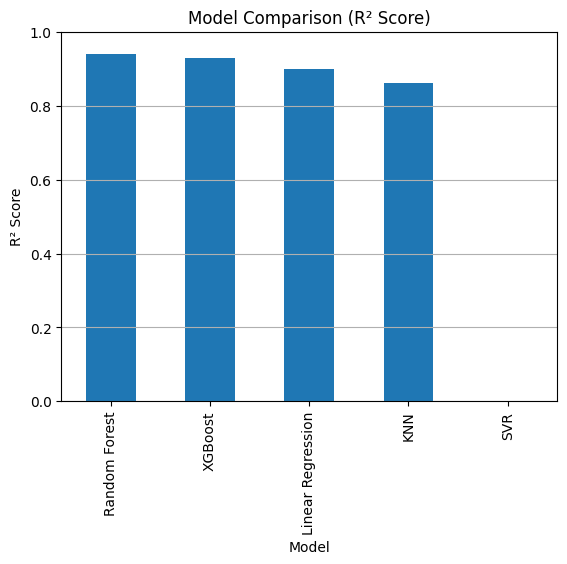

In [ ]:
import matplotlib.pyplot as plt

eval_matrix.set_index('Model')[['R2 Score']].plot(kind='bar', legend=False)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


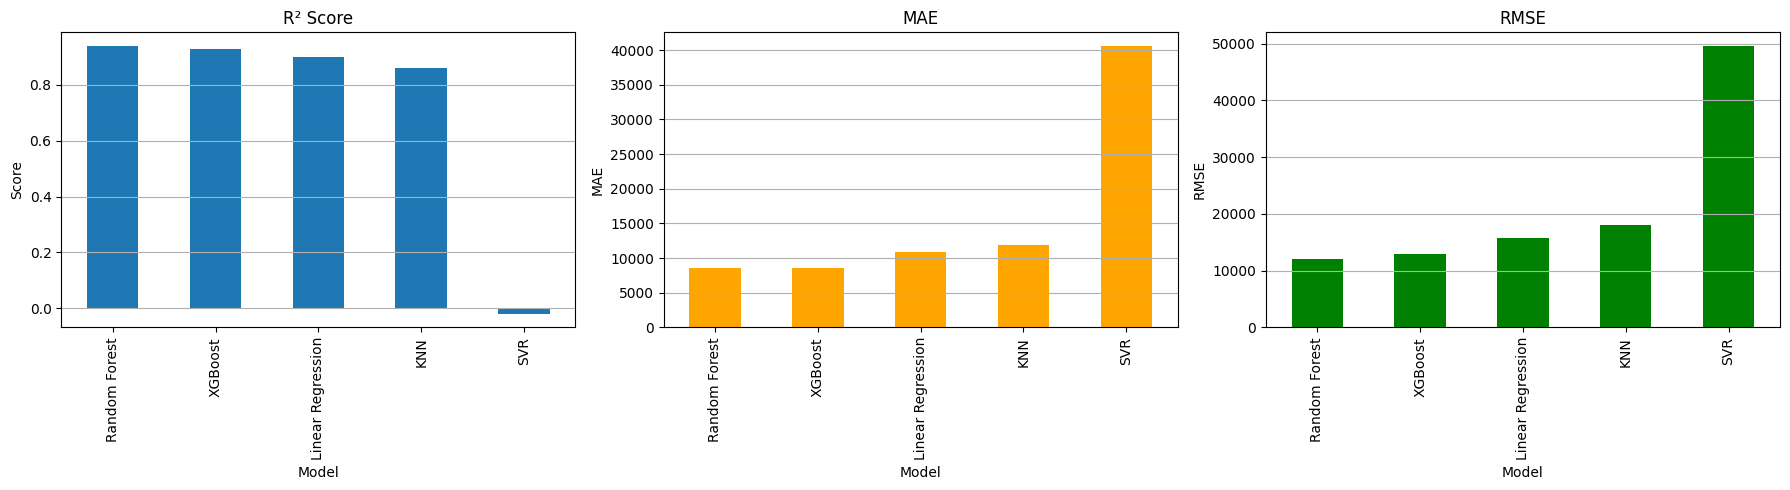

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score
eval_matrix.set_index('Model')[['R2 Score']].plot(
    kind='bar', ax=axes[0], title='R² Score', legend=False)
axes[0].set_ylabel("Score")
axes[0].grid(axis='y')

# MAE
eval_matrix.set_index('Model')[['MAE']].plot(
    kind='bar', color='orange', ax=axes[1], title='MAE', legend=False)
axes[1].set_ylabel("MAE")
axes[1].grid(axis='y')

# RMSE
eval_matrix.set_index('Model')[['RMSE']].plot(
    kind='bar', color='green', ax=axes[2], title='RMSE', legend=False)
axes[2].set_ylabel("RMSE")
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()


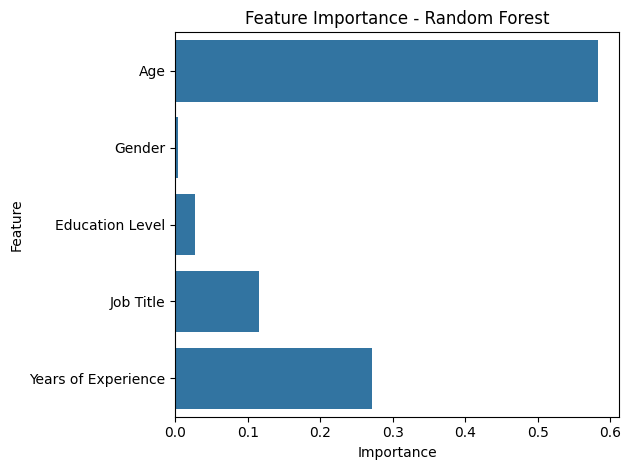

In [ ]:
import seaborn as sns

importances = models['Random Forest'].feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models['Random Forest'], X, y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())


Cross-validated R²: 0.8914684655595669


In [ ]:
eval_matrix.to_csv("model_evaluation_summary.csv", index=False)


In [ ]:
import joblib

# Save the best model (Random Forest)
joblib.dump(models['Random Forest'], "best_model.pkl")

# Save the encoders
joblib.dump(label_encoders, "encoders.pkl")


['encoders.pkl']

In [ ]:
from google.colab import files

files.download("best_model.pkl")
files.download("encoders.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("model_evaluation_summary.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save multiple models
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(models['XGBoost'], 'xgboost_model.pkl')
joblib.dump(models['Linear Regression'], 'linear_model.pkl')


['linear_model.pkl']

In [ ]:
from google.colab import files

files.download('random_forest_model.pkl')
files.download('xgboost_model.pkl')
files.download('linear_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import pandas as pd

model = joblib.load("xgboost_model.pkl")

# Dummy input assuming encoded values
sample_input = pd.DataFrame([{
    'Age': 30,
    'Gender': 1,  # example encoded value
    'Education Level': 2,
    'Job Title': 5,
    'Years of Experience': 5
}])

pred = model.predict(sample_input)
print(pred)


[66386.48]


In [ ]:
import joblib

# Save multiple models
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(models['XGBoost'], 'xgboost_model.pkl')
joblib.dump(models['Linear Regression'], 'linear_model.pkl')

['linear_model.pkl']

In [ ]:
import joblib
import pandas as pd

model = joblib.load("xgboost_model.pkl")

# Dummy input assuming encoded values
sample_input = pd.DataFrame([{
    'Age': 30,
    'Gender': 1,  # example encoded value
    'Education Level': 2,
    'Job Title': 5,
    'Years of Experience': 5
}])

pred = model.predict(sample_input)
print(pred)

[66386.48]


In [ ]:
print("Columns in the dataset:", df.columns.tolist())


Columns in the dataset: ['Age\tGender\tEducation Level\tJob Title\tYears of Experience\tSalary']


In [ ]:
# Load and clean data
df = pd.read_csv("Salary Data.csv")

# Strip column names and fix delimiter issue if needed
df.columns = [col.strip() for col in df.columns]
if df.columns[0].count('\t') > 0:
    df = df[df.columns[0]].str.split('\t', expand=True)
    df.columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

# Drop rows with missing target
df = df.dropna(subset=['Salary'])

# Separate features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
import joblib

encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    joblib.dump(le, f"{col.lower().replace(' ', '_')}_encoder.pkl")
    encoders[col] = le

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "rf_model.pkl")


['rf_model.pkl']

In [ ]:
# 1. Install dependencies
!pip install joblib shap pandas scikit-learn xgboost

# 2. Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import joblib

# 3. Load dataset
df = pd.read_csv("Salary Data.csv")  # replace with your filename
df.columns = [col.strip() for col in df.columns]

# If only one column due to tab-delimited
if len(df.columns) == 1:
    df = df[df.columns[0]].str.split('\t', expand=True)
    df.columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

# Convert data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Drop rows with missing Salary
df.dropna(subset=["Salary"], inplace=True)

# 4. Encode categorical columns
encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    joblib.dump(le, f"{col.lower().replace(' ', '_')}_encoder.pkl")
    encoders[col] = le

# 5. Split features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 6. Train and save RandomForest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "rf_model.pkl")

# 7. Train and save XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, "xgb_model.pkl")


['xgb_model.pkl']

In [ ]:
# Upload the file from your local system
from google.colab import files

uploaded = files.upload()


Saving Salary Data.csv to Salary Data (1).csv


In [ ]:
import io

# Automatically get the filename from the uploaded dictionary
uploaded_file_path = list(uploaded.keys())[0]

# Load it into a DataFrame
df = pd.read_csv(io.StringIO(uploaded[uploaded_file_path].decode('utf-8')), sep='\t')


In [ ]:
# Upload the file
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

# Read the uploaded file
uploaded_file_path = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[uploaded_file_path].decode('utf-8')), sep='\t')


Saving Salary Data.csv to Salary Data (2).csv


In [ ]:
# Strip column names in case there are tabs/spaces
df.columns = [col.strip() for col in df.columns]

# Drop rows where salary is missing
df = df.dropna(subset=['Salary'])

# Check and convert data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Drop rows with any NaNs after conversion
df = df.dropna()


/tmp/ipython-input-40-3946777176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
/tmp/ipython-input-40-3946777176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')
/tmp/ipython-input-40-3946777176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
gender_encoder = LabelEncoder()
education_encoder = LabelEncoder()
job_encoder = LabelEncoder()

# Encode categorical columns
df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df['Education Level'] = education_encoder.fit_transform(df['Education Level'])
df['Job Title'] = job_encoder.fit_transform(df['Job Title'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
import joblib

# Save the model
joblib.dump(model, "rf_model.pkl")

# Save the encoders
joblib.dump(gender_encoder, "gender_encoder.pkl")
joblib.dump(education_encoder, "education_encoder.pkl")
joblib.dump(job_encoder, "job_encoder.pkl")


['job_encoder.pkl']

In [ ]:
from google.colab import files

files.download("rf_model.pkl")
files.download("gender_encoder.pkl")
files.download("education_encoder.pkl")
files.download("job_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>